# Descripción:

- Verificamos que las rutas obtenidas de entrenamiento y test son iguales usando el método **Series Description** del archivo DICOM
- Más aún, hasta el fondo del script (después de verificar y contar los elementos para que coincidan con los del papper), guardamos las rutas en 3 partes, cada una correspondiendo a cada etiqueta: B, M y BWC.

In [1]:
"""importamos librerías"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pydicom #Read dicom files

# CSV GENERAL (Externos)

Estos se encuentran junto con las carpetas que contienen las imágene y son cuatro tipos:

- "mass_case_description_train_set.csv" (Par el conjunto de entrenamiento correspondiente a las masas)
- "mass_case_description_test_set.csv" (Par el conjunto de test correspondiente a las masas)
- "calc_case_description_train_set.csv" (Par el conjunto de entrenamiento correspondiente a las calcificaciones)
- "calc_case_description_test_set.csv" (Par el conjunto de test correspondiente a las calcificaciones)




In [2]:
#Mass GENERAL Train set
datos_general_train = pd.read_csv(r"D:\CBIS-DDSM\mass_case_description_train_set.csv")

In [3]:
datos_general_train

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,2,RIGHT,MLO,1,mass,IRREGULAR,ILL_DEFINED,3,MALIGNANT,4,Mass-Training_P_02033_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....
1314,P_02079,2,RIGHT,CC,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_CC/1.3.6.1.4.1.959...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...
1315,P_02079,2,RIGHT,MLO,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....
1316,P_02092,2,LEFT,CC,1,mass,IRREGULAR,SPICULATED,3,MALIGNANT,2,Mass-Training_P_02092_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...


1318 Elementos

In [4]:
rutas_gen = datos_general_train['cropped image file path'].str.split('/', expand = True)

In [5]:
rutas_gen[0]

0         Mass-Training_P_00001_LEFT_CC_1
1        Mass-Training_P_00001_LEFT_MLO_1
2         Mass-Training_P_00004_LEFT_CC_1
3        Mass-Training_P_00004_LEFT_MLO_1
4       Mass-Training_P_00004_RIGHT_MLO_1
                      ...                
1313    Mass-Training_P_02033_RIGHT_MLO_1
1314     Mass-Training_P_02079_RIGHT_CC_1
1315    Mass-Training_P_02079_RIGHT_MLO_1
1316      Mass-Training_P_02092_LEFT_CC_1
1317     Mass-Training_P_02092_LEFT_MLO_1
Name: 0, Length: 1318, dtype: object

In [6]:
rutas_gen[0].nunique() #Hay 1318 únicos

1318

In [7]:
rastreo_etiq = pd.concat([datos_general_train[['pathology']], rutas_gen[0]], axis = 1)
rastreo_etiq

,pathology,0
0,MALIGNANT,Mass-Training_P_00001_LEFT_CC_1
1,MALIGNANT,Mass-Training_P_00001_LEFT_MLO_1
2,BENIGN,Mass-Training_P_00004_LEFT_CC_1
3,BENIGN,Mass-Training_P_00004_LEFT_MLO_1
4,BENIGN,Mass-Training_P_00004_RIGHT_MLO_1
...,...,...
1313,MALIGNANT,Mass-Training_P_02033_RIGHT_MLO_1
1314,MALIGNANT,Mass-Training_P_02079_RIGHT_CC_1
1315,MALIGNANT,Mass-Training_P_02079_RIGHT_MLO_1
1316,MALIGNANT,Mass-Training_P_02092_LEFT_CC_1


In [8]:
rastreo_etiq['cropped image file path SPLIT'] =rastreo_etiq[0] #Renombramos la columna
rastreo_etiq.drop(0,axis = 1,inplace=True) # o inplace = True 
#rastreo_etiq.replace('BENIGN_WITHOUT_CALLBACK','BENIGN', inplace=True) 
rastreo_etiq

,pathology,cropped image file path SPLIT
0,MALIGNANT,Mass-Training_P_00001_LEFT_CC_1
1,MALIGNANT,Mass-Training_P_00001_LEFT_MLO_1
2,BENIGN,Mass-Training_P_00004_LEFT_CC_1
3,BENIGN,Mass-Training_P_00004_LEFT_MLO_1
4,BENIGN,Mass-Training_P_00004_RIGHT_MLO_1
...,...,...
1313,MALIGNANT,Mass-Training_P_02033_RIGHT_MLO_1
1314,MALIGNANT,Mass-Training_P_02079_RIGHT_CC_1
1315,MALIGNANT,Mass-Training_P_02079_RIGHT_MLO_1
1316,MALIGNANT,Mass-Training_P_02092_LEFT_CC_1


In [9]:
rastreo_etiq.pathology.unique() #únicas etiquetas

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

Guardamos el df anterior

In [10]:
rastreo_etiq.to_csv('df_Mass_train_1318_3C.csv', index=False)  # index=False evita guardar el índice del DataFrame

ESTADÍSTICAS TRAIN:

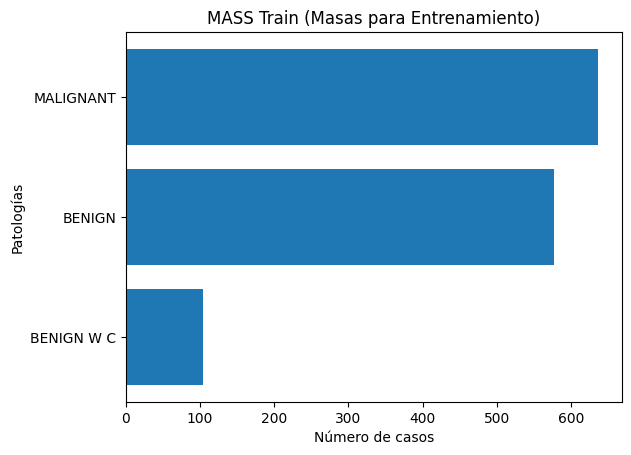

In [12]:
_, ax_plot = plt.subplots()
ax_plot.barh(['MALIGNANT', 'BENIGN', 'BENIGN W C'],
             [datos_general_train.pathology[datos_general_train['pathology'] == 'MALIGNANT'].value_counts()[0],
             datos_general_train.pathology[datos_general_train['pathology'] == 'BENIGN'].value_counts()[0],
             datos_general_train.pathology[datos_general_train['pathology'] == 'BENIGN_WITHOUT_CALLBACK'].value_counts()[0]
             ])
ax_plot.set_ylabel("Patologías")
ax_plot.invert_yaxis()  # labels read top-to-bottom
ax_plot.set_xlabel('Número de casos')
ax_plot.set_title('MASS Train (Masas para conjnto de Entrenamiento)')
plt.show()

In [69]:
datos_general_train.pathology[datos_general_train['pathology'] == 'MALIGNANT'].value_counts()[0]

637

In [70]:
datos_general_train.pathology[datos_general_train['pathology'] == 'BENIGN'].value_counts()[0]

577

In [71]:
datos_general_train.pathology[datos_general_train['pathology'] == 'BENIGN_WITHOUT_CALLBACK'].value_counts()[0]

104

# CSV PARTICULAR

Los csv particulares se encuentran en cada carpeta y depende si se selecciona el de masas, calcificaciones, entrenamiento y prueba o las imágenes completas, etc.

In [6]:
#Mass PARTICULAR Cropped files
datos_particular_train = pd.read_csv('D:\CBIS-DDSM\ROI de entrenamiento masivo e imágenes recortadas (DICOM)\manifest-LyDgOQGl3853937313152078328\metadata.csv')

In [7]:
datos_particular_train

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
0,1.3.6.1.4.1.9590.100.1.2.227955274711225756835...,CBIS-DDSM,NaN,https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY,Mass-Training_P_00001_LEFT_MLO_1,1.3.6.1.4.1.9590.100.1.2.188473874511440575807...,NaN,07-21-2016,ROI mask images,NaN,MG,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,2,12.90 MB,.\CBIS-DDSM\Mass-Training_P_00001_LEFT_MLO_1\0...,2023-10-20T15:42:39.527
1,1.3.6.1.4.1.9590.100.1.2.429120414011832984817...,CBIS-DDSM,NaN,https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY,Mass-Training_P_00004_LEFT_CC_1,1.3.6.1.4.1.9590.100.1.2.414182170112396175925...,NaN,07-21-2016,ROI mask images,NaN,MG,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,2,16.79 MB,.\CBIS-DDSM\Mass-Training_P_00004_LEFT_CC_1\07...,2023-10-20T15:42:41.317
2,1.3.6.1.4.1.9590.100.1.2.296736403313792599626...,CBIS-DDSM,NaN,https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY,Mass-Training_P_00001_LEFT_CC_1,1.3.6.1.4.1.9590.100.1.2.108268213011361124203...,NaN,07-21-2016,ROI mask images,NaN,MG,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,2,14.99 MB,.\CBIS-DDSM\Mass-Training_P_00001_LEFT_CC_1\07...,2023-10-20T15:42:48.931
3,1.3.6.1.4.1.9590.100.1.2.115134232113001553100...,CBIS-DDSM,NaN,https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY,Mass-Training_P_00004_LEFT_MLO_1,1.3.6.1.4.1.9590.100.1.2.342549219112801262604...,NaN,07-21-2016,ROI mask images,NaN,MG,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,2,17.09 MB,.\CBIS-DDSM\Mass-Training_P_00004_LEFT_MLO_1\0...,2023-10-20T15:42:56.027
4,1.3.6.1.4.1.9590.100.1.2.128573663126257012032...,CBIS-DDSM,NaN,https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY,Mass-Training_P_00004_RIGHT_MLO_1,1.3.6.1.4.1.9590.100.1.2.341142631111685501338...,NaN,07-21-2016,ROI mask images,NaN,MG,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,2,16.36 MB,.\CBIS-DDSM\Mass-Training_P_00004_RIGHT_MLO_1\...,2023-10-20T15:42:56.256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,1.3.6.1.4.1.9590.100.1.2.387325662211652062642...,CBIS-DDSM,NaN,https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY,Mass-Training_P_02079_RIGHT_MLO_1,1.3.6.1.4.1.9590.100.1.2.256020282510763753112...,NaN,07-21-2016,ROI mask images,NaN,MG,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,1,13.64 MB,.\CBIS-DDSM\Mass-Training_P_02079_RIGHT_MLO_1\...,2023-10-20T17:22:06.549
1406,1.3.6.1.4.1.9590.100.1.2.314202752110860447319...,CBIS-DDSM,NaN,https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY,Mass-Training_P_02092_LEFT_CC_1,1.3.6.1.4.1.9590.100.1.2.200452024113930280039...,NaN,07-20-2016,cropped images,NaN,MG,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,1,337.01 KB,.\CBIS-DDSM\Mass-Training_P_02092_LEFT_CC_1\07...,2023-10-20T17:22:06.748
1407,1.3.6.1.4.1.9590.100.1.2.321062807811123845106...,CBIS-DDSM,NaN,https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY,Mass-Training_P_02092_LEFT_MLO_1,1.3.6.1.4.1.9590.100.1.2.195655760513031195523...,NaN,07-20-2016,cropped images,NaN,MG,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,1,379.24 KB,.\CBIS-DDSM\Mass-Training_P_02092_LEFT_MLO_1\0...,2023-10-20T17:22:08.084
1408,1.3.6.1.4.1.9590.100.1.2.237405159212695555542...,CBIS-DDSM,NaN,https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY,Mass-Training_P_02092_LEFT_CC_1,1.3.6.1.4.1.9590.100.1.2.122076137210534155240...,NaN,07-21-2016,ROI mask images,NaN,MG,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,1,11.78 MB,.\CBIS-DDSM\Mass-Training_P_02092_LEFT_CC_1\07...,2023-10-20T17:22:10.594


1410 Elementos

# Obtención de ETIQUETAS:

Las ETIQUETAS correspondientes a las PATOLOGÍAS (MALIGN, BENIGN, BWC) se encuentra en archivos GENERALES (column Pathology), por lo que debemos usar este metadata para poder etiquetar las imágenes correctamente conseguir. Observemos que column "cropped image file path" de datos GENERAL se relaciona con column "Subject ID" de datos CSV PARTICULAR.

Mediante PYDICOM podemos leer los archivos DICOM y luego, con el método **.PatientID** podemos acceder al siguiente tipo de información: **'Mass-Training_P_00004_RIGHT_MLO_1'**. Observemos que este pertenece a la columna **Subject ID** de CSV PARTICULAR, por lo tanto podemos etiquetar las imágenes de la siguiente manera:

Imágenes ---> SubjectID (CSV PARTICULAR)---> "cropped image file path" (CSV GENERAL) ---> ETIQUETA (Patología), siempre y cuando el número de elementos coincida en CSV PARTICULAR y CSV GENERAL, **lo cual no ocurre en CALCIFICACIONES porque falta 1 imagen.**

**OBSERVACIONES:** 
- Existen imágenes "mal etiquetadas", ya que nos importan los parches (cropped files) y terminan según en 1-1.dcm y los ROIS en 1-2.dcm, sin embargo en algunos casos las imágenes están permutadas!!!
- El número de imágenes a usar serán las de los CSV PARTICULAR, ya que este csv se encuentra en la carpeta donde se encuentran las imágenes a usar y de hecho más abajo se encontró que el número de archivos obtenidos mediante el método  **leer_img.SeriesDescription == 'cropped images'** es de 585 + 733 = 1318, lo cuál coincide con el número indicado por el archivo CSV PARTICULAR.

Para hallar las reales primero se fijo en el tamaño de MB, ya que los ROIs pesan mucho más que los parches, sin embargo es un poco tardado, encontrando que un buen filtro es para 2MB, y así se obtienen la mayoría, sin embargo, la "mayoría de imágenes" presentan un método llamado **.SeriesDescription**, el cual para los parches **'cropped images'** mientras que para los ROIs **'ROI mask images'**, por lo que planeamos usar este método. Cabe mencionar que usamos el filtro de MB en calcificaciones y este otro método, resultando en obtener el mismo número de etiquetas.

A día de hoy ya tenemos las etiquetas de aquí con el filtro de 2MB y veamos qué pasa usando el método de los archivos DICOM.


# Rutas de MASAS:

Análisis de archivos con terminación 1-1.dcm y 1-2.dcm

TRAIN

In [9]:
from glob import glob

In [10]:
#Todos los Archivos cropped con terminación 1-1.dcm
lista_de_rutas_11 = glob(r'D:\CBIS-DDSM\ROI de entrenamiento masivo e imágenes recortadas (DICOM)\manifest-LyDgOQGl3853937313152078328\CBIS-DDSM\*\*\*\1-1.dcm')

In [12]:
len(lista_de_rutas_11)

1410

In [11]:
#Todos los Archivos cropped con terminación 1-2.dcm
lista_de_rutas_12= glob(r'D:\CBIS-DDSM\ROI de entrenamiento masivo e imágenes recortadas (DICOM)\manifest-LyDgOQGl3853937313152078328\CBIS-DDSM\*\*\*\1-2.dcm')

In [13]:
len(lista_de_rutas_12)

1226

RESUMEN: 1410 con terminación 1-1.dcm , 1226 con terminación 1-2.dcm, datos CSV GENERAL indica 1318 elementos y CSV PARTICULAR nos indica 1410.

# CONTEO IMÁGENES

In [89]:
784+141+771 #Según el papper de Mracko

1696

In [90]:
1318+378 #Train más TEST cincide con esta cuenta, falta corroborar las etiquetas

1696

# Veamos algunas imágenes:

In [14]:
#Archivo terminación 1-2.dcm
img_prueba_1 = r'D:\CBIS-DDSM\ROI de entrenamiento masivo e imágenes recortadas (DICOM)\manifest-LyDgOQGl3853937313152078328\CBIS-DDSM\Mass-Training_P_00004_RIGHT_MLO_1\07-21-2016-DDSM-NA-83774\1.000000-ROI mask images-84846\1-2.dcm'

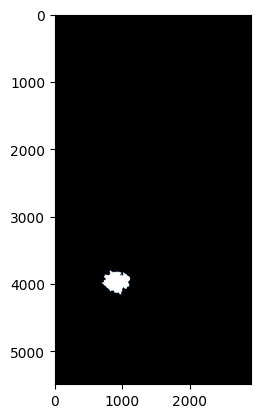

In [16]:
arch_prueba_1 = pydicom.dcmread(img_prueba_1)
plt.imshow(arch_prueba_1.pixel_array, cmap=plt.cm.bone)

ROI con terminación 1-2.dcm

In [18]:
#Archivo terminación 1-1.dcm
img_prueba_1R = r'D:\CBIS-DDSM\ROI de entrenamiento masivo e imágenes recortadas (DICOM)\manifest-LyDgOQGl3853937313152078328\CBIS-DDSM\Mass-Training_P_00004_RIGHT_MLO_1\07-21-2016-DDSM-NA-83774\1.000000-ROI mask images-84846\1-1.dcm'

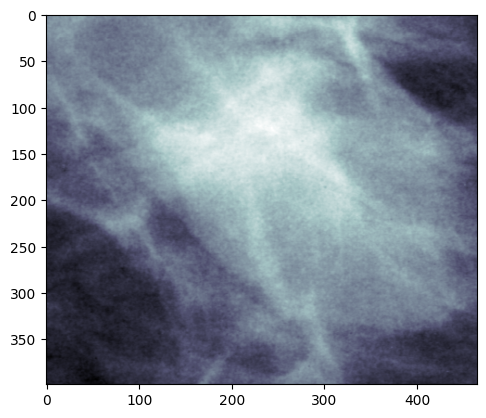

In [19]:
arch_prueba_1R = pydicom.dcmread(img_prueba_1R)
plt.imshow(arch_prueba_1R.pixel_array, cmap=plt.cm.bone)

Parche terminación 1-1.dcm, el de arriba es su ROI. Se menciona que el archivo 1 y 5 están permutados.

In [25]:
arch_prueba_1R

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.354155930913161100831763421884020581571
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.2.354155930913161100831763421884020581571
(0008, 0020) Study Date                          DA: '20160720'
(0008, 0023) Content D

In [21]:
lista_de_rutas_11[0]

'D:\\CBIS-DDSM\\ROI de entrenamiento masivo e imágenes recortadas (DICOM)\\manifest-LyDgOQGl3853937313152078328\\CBIS-DDSM\\Mass-Training_P_00001_LEFT_CC_1\\07-21-2016-DDSM-NA-39106\\1.000000-ROI mask images-99650\\1-1.dcm'

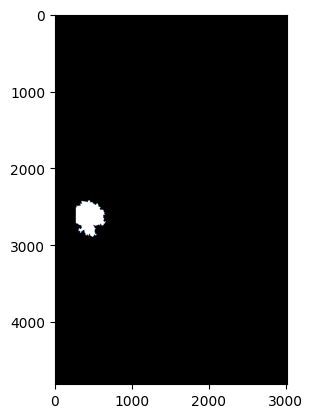

In [20]:
plt.imshow(pydicom.dcmread(lista_de_rutas_11[0]) .pixel_array, cmap=plt.cm.bone)

In [22]:
lista_de_rutas_12[0]

'D:\\CBIS-DDSM\\ROI de entrenamiento masivo e imágenes recortadas (DICOM)\\manifest-LyDgOQGl3853937313152078328\\CBIS-DDSM\\Mass-Training_P_00001_LEFT_CC_1\\07-21-2016-DDSM-NA-39106\\1.000000-ROI mask images-99650\\1-2.dcm'

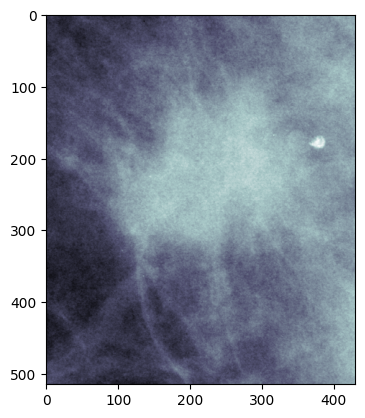

In [23]:
plt.imshow(pydicom.dcmread(lista_de_rutas_12[0]) .pixel_array, cmap=plt.cm.bone)

Se corrobora que esos archivos están permutados!!!

# Obtención de rutas de los parches existente usando el método **SeriesDescription**

Train

In [26]:
img_cropped_11 = []
img_ROI_11 = []
for ruta in lista_de_rutas_11:
    leer_img = pydicom.dcmread(ruta)
    if leer_img.SeriesDescription == 'cropped images':
        img_cropped_11.append(ruta)
    elif leer_img.SeriesDescription == 'ROI mask images':
        img_ROI_11.append(ruta)
    else:
        print("Error")   

In [27]:
img_cropped_12 = []
img_ROI_12 = []
for ruta in lista_de_rutas_12:
    leer_img_2 = pydicom.dcmread(ruta)
    if leer_img_2.SeriesDescription == 'cropped images':
        img_cropped_12.append(ruta)
    elif leer_img_2.SeriesDescription == 'ROI mask images':
        img_ROI_12.append(ruta)
    else:
        print("Error")  

In [28]:
len(img_cropped_11)

733

In [29]:
len(img_ROI_11)

677

In [30]:
len(img_cropped_12)

585

In [31]:
len(img_ROI_12)

641

Esto de arriba muestra que hay imágenes permutadas pero las que nos interesan son las listas: img_cropped_11 y img_cropped_12, es decir: 585+733 = 1318. 

Así obtenemos las rutas hacia los Parches, así como el número de estos, coincidiendo con el número indicado por el CSV PARTICULAR!!!

# Se cargan las rutas obtenidas de las imágenes por peso en MB (Mass) para compararlas

Estas rutas se obtuvieron pesando los archivos y aquellos más pesados correspondían a los ROIs o máscaras mientras que los menos pesados correspondían a los parches (cropped files)

In [10]:
rutas_train = np.load(r"C:\Users\MANC_\Desktop\Scripts Mastografías\CBIS-DDSM\MASS\rutas_train_mass_1318.npy")

In [33]:
len(rutas_train)

1318

In [34]:
imgs_cropped = img_cropped_11 + img_cropped_12

In [35]:

# Verificar si los arreglos son iguales
son_iguales = np.array_equal(rutas_train, imgs_cropped)

# Imprimir el resultado
print("¿Los arreglos son iguales?", son_iguales)

¿Los arreglos son iguales? False


Coinciden en el número de elementos pero indica falsedad, posiblemente porque estén permutados los eleemntos como podemos ver abajo:

In [50]:
np.where(imgs_cropped != rutas_train)

(array([ 374,  375,  376,  377,  378,  379,  380,  381,  382,  383,  384,
         385,  386,  387,  388,  389,  390,  391,  392,  393,  394,  395,
         396,  397,  398,  399,  400,  401,  402,  403,  404,  405,  406,
         407,  408,  409,  410,  411,  412,  413,  414,  415,  416,  417,
         418,  419,  420,  421,  422,  423,  424,  425,  426,  427,  428,
         429,  430,  431,  432,  433,  434,  435,  436,  437,  438,  439,
         440,  441,  442,  443,  444,  445,  446,  447,  448,  449,  450,
         451,  452,  453,  454,  455,  456,  457,  458,  459,  460,  461,
         462,  463,  464,  465,  466,  467,  468,  469,  470,  471,  472,
         473,  474,  475,  476,  477,  478,  479,  480,  481,  482,  483,
         484,  485,  486,  487,  488,  489,  490,  491,  492,  493,  494,
         495,  496,  497,  498,  499,  500,  501,  502,  503,  504,  505,
         506,  507,  508,  509,  510,  511,  512,  513,  514,  515,  516,
         517,  518,  519,  520,  521, 

In [48]:
rutas_train[374]

'D:\\CBIS-DDSM\\ROI de entrenamiento masivo e imágenes recortadas (DICOM)\\manifest-LyDgOQGl3853937313152078328\\CBIS-DDSM\\Mass-Training_P_00990_RIGHT_MLO_1\\07-21-2016-DDSM-NA-25262\\1.000000-ROI mask images-04843\\1-1.dcm'

In [49]:
if rutas_train[374] in imgs_cropped:
    print(1)
else:
    print(0)

1


Ordenamos los elementos y obtenemos que en las listas son iguales (se muestra abajo)!!!

In [51]:
imgs_cropped_SORTED = np.sort(imgs_cropped)
rutas_train_SORTED = np.sort(rutas_train)

In [52]:
# Verificar si los arreglos son iguales
print("¿Los arreglos son iguales?", np.array_equal(imgs_cropped_SORTED,rutas_train_SORTED))

¿Los arreglos son iguales? True


# TEST

In [53]:
lista_de_rutas_11_test = glob(r'D:\CBIS-DDSM\ROI de prueba masiva e imágenes recortadas (DICOM)\manifest-OlX3eVq41551709337535597984\CBIS-DDSM\*\*\*\1-1.dcm')  # Guarda la lista de rutas en una variable

In [54]:
len(lista_de_rutas_11_test)

389

Hay 389 imágenes en Test con terminación 1-1.dcm

In [55]:
lista_de_rutas_12_test = glob(r'D:\CBIS-DDSM\ROI de prueba masiva e imágenes recortadas (DICOM)\manifest-OlX3eVq41551709337535597984\CBIS-DDSM\*\*\*\1-2.dcm')  # Guarda la lista de rutas en una variable

In [56]:
len(lista_de_rutas_12_test)

367

Hay 367 imágenes en Test con terminación 1-1.dcm

Abajo también se localizan los parches usados para el Test con el método **SeriesDescription**

In [57]:
img_cropped_11_T = []
img_ROI_11_T = []
for ruta in lista_de_rutas_11_test:
    leer_img = pydicom.dcmread(ruta)
    if leer_img.SeriesDescription == 'cropped images':
        img_cropped_11_T.append(ruta)
    elif leer_img.SeriesDescription == 'ROI mask images':
        img_ROI_11_T.append(ruta)
    else:
        print("Error")   

In [58]:
img_cropped_12_T = []
img_ROI_12_T = []
duda_archivo =[]
for ruta in lista_de_rutas_12_test:
    try:
        leer_img_2 = pydicom.dcmread(ruta)
        if leer_img_2.SeriesDescription == 'cropped images':
            img_cropped_12_T.append(ruta)
        elif leer_img_2.SeriesDescription == 'ROI mask images':
            img_ROI_12_T.append(ruta)
        else:
            print("Error")  
    except:
        duda_archivo.append(ruta)
        continue

In [59]:
len(img_cropped_11_T)

376

In [60]:
len(img_ROI_11_T)

13

In [61]:
len(img_cropped_12_T)

2

In [62]:
len(img_ROI_12_T)

365

In [64]:
imgs_cropped_test = img_cropped_11_T + img_cropped_12_T

In [11]:
rutas_test = np.load(r"C:\Users\MANC_\Desktop\Scripts Mastografías\CBIS-DDSM\MASS\rutas_test_mass_378.npy")

In [86]:
len(rutas_test)

378

Deben ser 378 imágenes en Test

In [67]:

# Verificar si los arreglos son iguales
son_iguales_T = np.array_equal(rutas_test, imgs_cropped_test)

# Imprimir el resultado
print("¿Los arreglos son iguales?", son_iguales_T)

¿Los arreglos son iguales? True


RESUMEN: Todas las RUTAS son iguales, así que podemos iniciar algún preprocesamiento!!!

In [72]:
544+637

1181

In [73]:
528+577

1105

In [74]:
474+104

578

In [75]:
1181+1105+578

2864

In [13]:
mass_case_test = pd.read_csv(r"D:\CBIS-DDSM\mass_case_description_test_set.csv")
rutas_gen_test = mass_case_test['cropped image file path'].str.split('/', expand = True)
rastreo_etiq_test = pd.concat([mass_case_test[['pathology']], rutas_gen_test[0]], axis = 1)

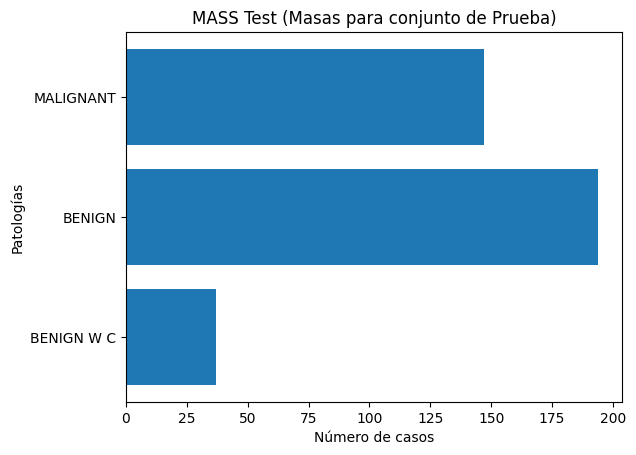

In [14]:
_, ax_plot = plt.subplots()
ax_plot.barh(['MALIGNANT', 'BENIGN', 'BENIGN W C'],
             [mass_case_test.pathology[mass_case_test['pathology'] == 'MALIGNANT'].value_counts()[0],
             mass_case_test.pathology[mass_case_test['pathology'] == 'BENIGN'].value_counts()[0],
             mass_case_test.pathology[mass_case_test['pathology'] == 'BENIGN_WITHOUT_CALLBACK'].value_counts()[0]
             ])
ax_plot.set_ylabel("Patologías")
ax_plot.invert_yaxis()  # labels read top-to-bottom
ax_plot.set_xlabel('Número de casos')
ax_plot.set_title('MASS Test (Masas para conjunto de Prueba)')
plt.show()

In [13]:
#rastreo_etiq_test.replace('BENIGN_WITHOUT_CALLBACK','BENIGN', inplace = True) # etiquetas
rastreo_etiq_test['cropped image file path SPLIT'] =rastreo_etiq_test[0] #Renombramos la columna
rastreo_etiq_test.drop(0,axis = 1, inplace = True)
rastreo_etiq_test

,pathology,cropped image file path SPLIT
0,MALIGNANT,Mass-Test_P_00016_LEFT_CC_1
1,MALIGNANT,Mass-Test_P_00016_LEFT_MLO_1
2,MALIGNANT,Mass-Test_P_00017_LEFT_CC_1
3,MALIGNANT,Mass-Test_P_00017_LEFT_MLO_1
4,BENIGN,Mass-Test_P_00032_RIGHT_CC_1
...,...,...
373,BENIGN_WITHOUT_CALLBACK,Mass-Test_P_01825_RIGHT_MLO_1
374,MALIGNANT,Mass-Test_P_01833_RIGHT_MLO_1
375,MALIGNANT,Mass-Test_P_01865_LEFT_MLO_1
376,MALIGNANT,Mass-Test_P_01912_RIGHT_CC_1


In [94]:
# Guardar el DataFrame como un archivo CSV, falta ver si son los 378 archivos
rastreo_etiq_test.to_csv('df_Mass_test_378_3C.csv', index=False)  # index=False evita guardar el índice del DataFrame

# IMPORTANTE

Ahora se van a guardar las rutas hacia las imágenes pero con su patología. Esto genera 6 rutas: 3 de Train (Benign,Malignant,BWC) y 3 de Test (Benign,Malignant,BWC).

In [14]:
# Enlistamos rutas TRAIN por patología
B = []
M = []
BWC = []

for file in rutas_train:
    read_img_dicom = pydicom.dcmread(file) #Lectura imgs DICOM
    patient_ID = read_img_dicom.PatientID #Obtenemos PatienID para usarlo en el df rastreo_etiq
    etiqueta = rastreo_etiq[rastreo_etiq['cropped image file path SPLIT'] == patient_ID].pathology.values[0]
    if etiqueta == 'MALIGNANT':
        M.append(file)
    elif etiqueta == 'BENIGN':
        B.append(file)
    elif etiqueta == 'BENIGN_WITHOUT_CALLBACK':
        BWC.append(file)
    else:
        print('Error')
        break

In [15]:
len(B)

577

In [16]:
len(M)

637

In [18]:
len(BWC)

104

Esto genera estadísticas más precisas que las de Mracko, sin olvidar que en la suma coinciden con las de dicho autor. 

In [19]:
# Enlistamos rutas TEST por patología
B_T = []
M_T = []
BWC_T = []

for file in rutas_test:
    read_img_dicom = pydicom.dcmread(file) #Lectura imgs DICOM
    patient_ID = read_img_dicom.PatientID #Obtenemos PatienID para usarlo en el df rastreo_etiq
    etiqueta = rastreo_etiq_test[rastreo_etiq_test['cropped image file path SPLIT'] == patient_ID].pathology.values[0]
    if etiqueta == 'MALIGNANT':
        M_T.append(file)    
    elif etiqueta == 'BENIGN':
        B_T.append(file)
    elif etiqueta == 'BENIGN_WITHOUT_CALLBACK':
        BWC_T.append(file)
    else:
        print('Error')
        break

In [20]:
len(B_T)

194

In [21]:
len(M_T)

147

In [22]:
len(BWC_T)

37

In [103]:
194 + 577 # B total

771

In [104]:
147 + 637 #M total

784

In [105]:
37 + 104#BWC total

141

# Guardamos las rutas de las imágenes correspondientes a B, M y BWC.

In [25]:
BENIGN = np.array(B)
np.save("rutas_train_mass_BENIGN_577.npy",BENIGN)

In [26]:
MALIGNANT = np.array(M)
np.save("rutas_train_mass_MALIGNANT_637.npy",MALIGNANT)

In [27]:
BWC_npy = np.array(BWC)
np.save("rutas_train_mass_BWC_104.npy",BWC_npy)

In [28]:
BENIGN_T = np.array(B_T)
np.save("rutas_test_mass_BENIGN_194.npy",BENIGN_T)

In [29]:
MALIGNANT_T = np.array(M_T)
np.save("rutas_test_mass_MALIGNANT_147.npy",MALIGNANT_T)

In [30]:
BWC_npy_T = np.array(BWC_T)
np.save("rutas_test_mass_BWC_37.npy",BWC_npy_T)